In [1]:
import pandas as pd
from util import *

https://www.kaggle.com/vikasg/russian-troll-tweets/data
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object

In [2]:
tweets = pd.read_csv('tweets.csv')
users = pd.read_csv('users.csv')

In [3]:
tweets = tweets.rename(index=str, columns={"user_id": "id"})
tc, uc = set(tweets.columns), set(users.columns)
cc = tc.intersection(uc)
#combined = pd.merge(tweets, users, how='left', on='id')

In [4]:
#combined.shape

In [5]:
"tweets", tweets.shape, "users", users.shape

('tweets', (203482, 16), 'users', (454, 14))

In [6]:
users.head()

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
3,249538861.0,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
4,449689677.0,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0


In [7]:
tweets.head()

,id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [8]:
ht = find_top(tweets, "hashtags", sort_by='id', ascending=False)
ht = ht[['id']]
ht.columns = ['num_tweets']
ht = ht[ht.num_tweets > 100]
ht = ht[ht.index != '[]']

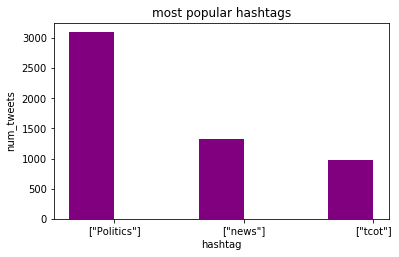

In [9]:
ht3 = ht.head(3)
plot_bar_chart(ht3.index, ht3.num_tweets, 'hashtag', 'num_tweets', 'most popular hashtags', width = 0.35, color = 'purple')

In [16]:
#top_users = find_top(combined, "id", sort_by='user_key')
#top_users = top_users[['location', 'name', 'followers_count',
#       'statuses_count', 'time_zone', 'verified', 'lang', 'screen_name',
#       'description', 'favourites_count', 'friends_count', 'listed_count']]

In [11]:
common_ucols = ['location', 'time_zone', 'verified', 'lang']
for c in common_ucols:
    x = users[c].unique()
    print(c, len(x))
    print(x)

location 108
['near Utah Ave & Lighthouse an' 'still ⬆️Block⤵️Corner⬇️street'
 'Chicago, IL' nan 'Санкт-Петербург, Россия' 'Amerika' 'USA'
 'Philadelphia, PA' 'ATL' 'United States' 'New York, USA' 'Alaska' 'NY'
 'Florida' 'St Louis, MO' 'US' 'Baltimore' 'Baton Rouge, LA' 'America'
 'Georgia, USA' 'Los Angeles, CA' 'Texas, USA' 'Baltimore, MD'
 'USA, Atlanta' 'Florida, USA' 'NYC' 'Москва, Россия' 'Мурманск'
 'Санкт-Петербург' 'Калининград, Россия' 'San Francisco, CA' 'Москва'
 'Калуга, Россия' 'Я везде' 'Ярославль, Россия' 'Питер' 'Moscow'
 'Washington, DC' 'Atlanta' 'Чита' 'New York' 'Atlanta, Georgia'
 'Барнаул, Россия' 'Atlanta, GA' 'New - York' 'Memphis, TN'
 'Detroit, Michigan' 'Russia' 'Ростов-на-Дону, Россия' 'Санкт-Петербург '
 'Россия' 'Тула, Тульская область' 'Montgomery' 'Kansas City, MO'
 'Pittsburgh, PA' 'arkansas' 'Boston' 'Washington, D.C.' 'New York, NY'
 'City of Cleveland, USA' 'City of Phoenix, Arizona'
 'City of San Antonio, TX' 'Pittsburgh, US' 'Richmond, VA' 'Newar

In [27]:
tl = find_top(users, 'lang', sort_by='id', ascending=False)
tl = tl['id']
t1 = tl.apply(lambda x: (x / 454)*100)

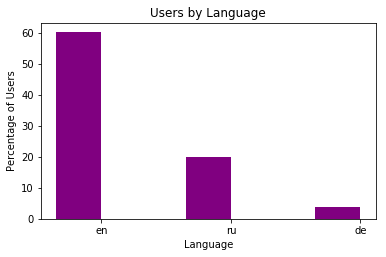

In [31]:
t1_3 = t1.head(3)
plot_bar_chart(t1_3.index, t1_3, "Language", "Percentage of Users", "Users by Language", width = 0.35, color = 'purple')